In [1]:
import json
from coursework import new_kmeans, pca, distance, Mean
from matplotlib import pyplot as plt
import numpy
from mpl_toolkits.mplot3d import axes3d

In [2]:
with open('time_points','r') as file:
    data = json.load(file)

In [ ]:
# saving clusters' and centres' coordinates

for i in range(len(data)):
    clusters, centres = new_kmeans(data[i], 6)
    centres = list(map(lambda x: list(x), centres))
    
    with open(f'centres/{i}', 'w') as file:
        json.dump(centres, file)
        
    with open(f'clusters/{i}', 'w') as file:
        json.dump(clusters, file)

In [ ]:
#defining correspondence between centres
indices_timeline = [] 
indices_timeline_distance = []

indices = [0,1,2,3,4,5]
indices_distance = [0,1,2,3,4,5]

total_timepoints = len(data)

for m in range(6):
    indices_timeline.append([])
    indices_timeline_distance.append([])
    
with open('centres/0','r') as file:
    centres = json.load(file)
with open('clusters/0','r') as file:
    clusters = json.load(file)
    
for i in range(1, total_timepoints): # for each time point
    
    last_centres = centres # saving last centre
    last_clusters = clusters
        
    for k in range(6):
        
        with open(f'centres/{i}','r') as file:
            centres = json.load(file)
            
        with open(f'clusters/{i}','r') as file:
            clusters = json.load(file)
        
        
        same_sized = indices[numpy.argmin([len(clusters[j]) - len(last_clusters[k]) for j in indices])]
        #getting exact index of the closest point among the ones that left
        closest = indices_distance[numpy.argmin([distance(centres[k], last_centres[j]) for j in indices_distance])] 
        # for each centre saving the closest one of the next time point
        indices_timeline_distance[k].append(closest)
        indices_timeline[k].append(same_sized)
        # removing already chosen index
        indices.remove(same_sized)
        indices_distance.remove(closest)
        
    indices = [0,1,2,3,4,5]
    indices_distance = [0,1,2,3,4,5]

# inserting centres for the time_point = 0
for i in range(len(indices_timeline)):
    indices_timeline[i].insert(0,i)
for i in range(len(indices_timeline_distance)):
    indices_timeline_distance[i].insert(0,i)

In [ ]:
centres_timeline = [] 

for i in range(6):
    centres_timeline.append([])

# for each cluster
for i in range(6):
    # for each time_point
    for j in range(total_timepoints):
        
        with open(f'centres/{j}', 'r') as file:
            centres = json.load(file)
        
        # contains each centres timeline
        centres_timeline[i].append(centres[indices_timeline[i][j]])

In [ ]:
clusters_timeline = [] 

for i in range(6):
    clusters_timeline.append([])

# for each cluster
for i in range(6):
    # for each time_point
    for j in range(total_timepoints):
        
        with open(f'clusters/{j}', 'r') as file:
            clusters = json.load(file)
        
        # contains each clusters timeline
        clusters_timeline[i].append(clusters[indices_timeline[i][j]])

In [ ]:
# with open('centres_timeline','w') as file:
#     json.dump(centres_timeline,file)
    
# with open('clusters_timeline','w') as file:
#     json.dump(clusters_timeline,file)

In [6]:
with open('centres_timeline','r') as file:
    centres_timeline = json.load(file)
    
with open('clusters_timeline','r') as file:
    clusters_timeline = json.load(file)

In [7]:
sizes = []
for i in range(total_timepoints):
    sizes.append(len(clusters_timeline[3][i]))

NameError: name 'total_timepoints' is not defined

In [ ]:
centres_2D = pca(centres_timeline[0],2)

In [ ]:
labels = ['aлкоголь', 'продукты для животных', 'выпечка', 'безалкогольные', 'сырные и колбасные изделия', 'табак', 
          'пищевые добавки', 'кондитерские изделия', 'полуфабрикаты', 'морепродукты', 'замороженные продукты', 
          'фрукты и овощи', 'бакалея', 'товары для домашнего хозяйства', 'продукты для детей', 'мясные изделия',
          'молочные продукты', 'другие', 'салаты', 'закуски', 'мыло-моющие средства']


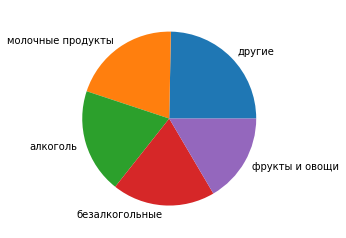

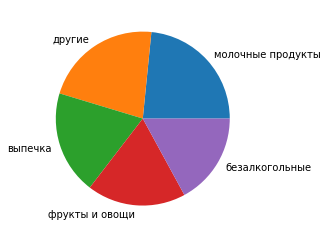

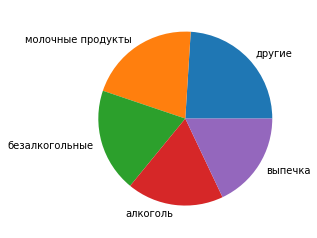

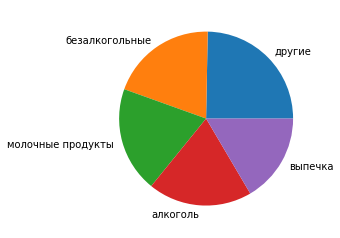

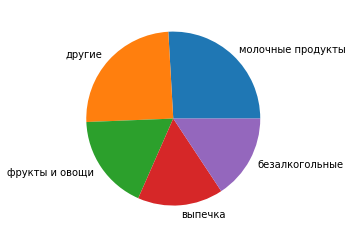

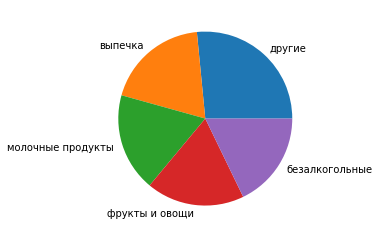

In [12]:
labels = ['aлкоголь', 'продукты для животных', 'выпечка', 'безалкогольные', 'сырные и колбасные изделия', 'табак', 
          'пищевые добавки', 'кондитерские изделия', 'полуфабрикаты', 'морепродукты', 'замороженные продукты', 
          'фрукты и овощи', 'бакалея', 'товары для домашнего хозяйства', 'продукты для детей', 'мясные изделия',
          'молочные продукты', 'другие', 'салаты', 'закуски', 'мыло-моющие средства']

for k in range(6):
    sizes = list(Mean(clusters_timeline[k][0]))
    percents = [categ / sum(sizes) for categ in sizes]
    max_indices=[]

    sizes_ = sizes.copy()
    for i in range(5):
        idx = numpy.argmax(sizes_)
        max_indices.append(idx)
        sizes_[idx] = -1

    labels_ = [labels[j] for j in max_indices]
    sizes.sort()
    sizes.reverse()
    percents.sort()
    percents.reverse()
    plt.pie(sizes[0:5], labels=labels_)
#     print(percents[0:5],labels_)
    plt.pause(0.05)